<a href="https://colab.research.google.com/github/qiannzzu/VPONclassification/blob/Yia/textCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

contents = pd.read_csv('/content/drive/MyDrive/input/ckipTagger.txt', sep = '\n', header=None).to_numpy().astype(str)
labels = pd.read_csv('/content/drive/MyDrive/input/labels.txt', sep = '\n', header=None).to_numpy().astype(str)

print(contents.ravel()[0])
print(labels.shape)

雅紅 珠寶 天然 三彩 翡翠 手鐲 185 柳綠 花 紅 雅紅珠寶
(175223, 1)


In [ ]:
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
tokenizer.fit_on_texts(contents.ravel())
vocab = tokenizer.word_index

x_train, x_test, y_train, y_test = train_test_split(contents.ravel(), labels, random_state=0, test_size=0.1)
x_train_word_ids = tokenizer.texts_to_sequences(x_train)
x_test_word_ids = tokenizer.texts_to_sequences(x_test)
x_train_padded_seqs = pad_sequences(x_train_word_ids, maxlen = 30)
x_test_padded_seqs = pad_sequences(x_test_word_ids, maxlen = 30)

print(x_train_padded_seqs[:5])

[[     0      0      0      0      0      0      0      0      0      0
       0   1935     37    592    154    188    214     88   7494   6582
      37     60  63835   3126   3067   5214   3244  31200    106   1935]
 [     0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0    585    437
     572  63135  96473  12028   2510  96474  96475  14872  26152    586]
 [     0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0    699    982
   63232  47854  18700     16   3331  31594    129    186    699    982]
 [     0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0  12576     97   1007
    8955    651  15518     72   1237    941    121  15552  40697  12576]
 [     0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0   

In [ ]:
print(x_train[:10])

print(x_train_word_ids[:10])

print(y_train[:10])

['雅紅 珠寶 天然 三彩 翡翠 手鐲 185 柳綠 花 紅 雅紅珠寶'
 'DOLLY 14K 金 無 燒孔 賽石 34 克拉 鑽石 項鍊 DOLLY'
 'KingStarGIA 無 螢光 雋 永一 克拉 18 K 金鑽石 戒指 最 白 Dcolor3Excellent 極 優 八心 八 箭 King Star'
 'King Star GIA 風韻 一 克拉 鑽石 戒指 豪華 鉑金台 King Star'
 'KingStarGIA 16 克拉 最 白 Dcolor3 Excellent 極 優滿 鑽 鉑金 鑽石 戒指 三 克拉 視覺 效果 King Star'
 'JyunPin 駿品 裝修 嚴選 系統 家 具 套裝 連 工帶 料 含 三 機 烤箱 微波爐 水槽 和 龍頭 防火 壁板 櫥 下 過濾器 Jyun Pin 駿品裝修'
 'JyunPin 駿品 裝修 嚴選 系統 家 具 套裝 連 工帶 料 含 三 機 烤箱 微波爐 水槽 和 龍頭 防火 壁板 櫥 下 過濾器 Jyun Pin 駿品裝修'
 'SONY 索尼 BRAVIA85型 8KFullArrayLED Google TV 顯示器 XRM85 Z9J SONY 索尼'
 'DOLLY 18K 金緬甸木 拿 玻璃種 翡翠 鑽石 項鍊 DOLLY'
 'KingStar 時 來 運轉 一 克 拉 鑽石 18 K金 戒指 D 頂級 顏色 King Star']
[[88901, 2181, 90, 25655, 3904, 8469, 4189, 60152, 831, 184, 88902], [2296, 18660, 534, 41, 88903, 88904, 1182, 644, 168, 201, 2296], [15434, 41, 3631, 88905, 88906, 644, 82, 79, 2307, 660, 132, 120, 7043, 177, 4282, 1840, 435, 1711, 638, 1426], [638, 1426, 1070, 88907, 19, 644, 168, 660, 1667, 8638, 638, 1426], [15434, 107, 644, 132, 120, 28135, 15435, 177, 88908, 550, 1789

In [ ]:
import gensim
from gensim.test.utils import common_texts
from gensim.models import word2vec
import numpy as np

model = gensim.models.KeyedVectors.load_word2vec_format('/content/drive/MyDrive/input/y_360W_cbow_2D_300dim_2020v1.bin', unicode_errors='ignore', binary=True)

In [ ]:
embedding_matrix = np.zeros((len(vocab)+1, 300))
for word, i in vocab.items():
  try:
    embedding_vector = model[str(word)]
    embedding_matrix[i] = embedding_vector
  except KeyError:
    continue

In [ ]:
import gensim
from gensim.test.utils import common_texts
from gensim.models import word2vec
import numpy as np

sentences = word2vec.LineSentence("/content/drive/MyDrive/input/ckipTagger.txt")
w2v_model = word2vec.Word2Vec(sentences, size=100)

embedding_matrix = np.zeros((len(vocab)+1, 100))
for word, i in vocab.items():
  try:
    embedding_vector = w2v_model[str(word)]
    embedding_matrix[i] = embedding_vector
  except KeyError:
    continue

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if sys.path[0] == '':


In [ ]:
from tensorflow.python.framework.ops import convert_to_tensor_v2_with_dispatch
from sklearn.model_selection import train_test_split
import pandas as pd
import jieba
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential,Model
from keras.layers import Input, Dense, Activation, Conv1D,MaxPooling1D, concatenate,Flatten,Embedding,Dropout
from keras.initializers import Constant
import keras
from keras.utils import np_utils
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from keras.callbacks import ModelCheckpoint

#textCNN model
def textCNN_model(embedding_matrix):
    #模型結構: 詞嵌入(word2vec)-卷積池化*3-拼接-全連接-dropout-全連接
    keras.backend.clear_session()
    main_input = Input(shape=(30,), dtype='float64')
    embedder = Embedding(len(embedding_matrix), 300, input_length=30, weights=[embedding_matrix], trainable=True)
    embed = embedder(main_input)
    cnn1 = Conv1D(256, 5, padding='same', strides=1, activation='sigmoid')(embed)
    cnn1 = MaxPooling1D(pool_size=5)(cnn1)
    cnn2 = Conv1D(256, 5, padding='same', strides=1, activation='sigmoid')(embed)
    cnn2 = MaxPooling1D(pool_size=5)(cnn2)
    cnn3 = Conv1D(256, 5, padding='same', strides=1, activation='sigmoid')(embed)
    cnn3 = MaxPooling1D(pool_size=5)(cnn3)
    #合併三個模型的輸出量
    cnn = concatenate([cnn1, cnn2, cnn3], axis=-1)
    flat = Flatten()(cnn)
    drop = Dropout(0.3)(flat)
    main_output = Dense(33, activation='sigmoid')(drop)
    textCNN = Model(inputs=main_input, outputs=main_output)
    textCNN.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return textCNN

In [ ]:
import numpy as np

xtrain_np = np.array(x_train_padded_seqs)
ytrain_np = np.array(y_train)
xtest_np = np.array(x_test_padded_seqs)
ytest_np = np.array(y_test)

print(xtrain_np.shape)
print(ytrain_np.shape)
print(xtest_np.shape)
print(ytest_np.shape)

(157700, 30)
(157700, 1)
(17523, 30)
(17523, 1)


In [ ]:
model_v1 = textCNN_model(embedding_matrix) 

In [ ]:
import sklearn.metrics as metrics
 
one_hot_labels = keras.utils.np_utils.to_categorical(ytrain_np, num_classes=33)
history = model_v1.fit(xtrain_np, one_hot_labels, batch_size = 1600, epochs = 1, shuffle = 1) 
result = model_v1.predict(xtest_np) #預測樣本屬於每個類別的概率
result_labels = np.argmax(result, axis=1) #取得最大概率對應的label
y_predict = list(map(str, result_labels))
print('準確率', metrics.accuracy_score(ytest_np, y_predict))
print('平均f1-score: ',metrics.f1_score(ytest_np, y_predict, average='weighted'))

model_v1.summary() 

99/99 [==============================] - 16s 158ms/step - loss: 0.0311 - accuracy: 0.9950
準確率 0.9218170404611082
平均f1-score:  0.9207138145838084
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 30)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 30, 300)      57009000    ['input_1[0][0]']                
                                                                                                  
 conv1d (Conv1D)                (None, 30, 256)      384256      ['embedding[0][0]']              
                                                                                                  
 conv1d_1 (Conv1D)              (None, 30, 256) 

In [ ]:
model_v1.save('/content/drive/MyDrive/input/textCNN_model_300d_92.13%_256-5-5-1_sigmoid.h5')

In [ ]:
from keras.models import load_model

model_v1 = load_model('/content/drive/MyDrive/input/textCNN_model_300d_89.61%_256-5-5-1_sigmoid.h5')

In [ ]:
one_hot_labels = keras.utils.np_utils.to_categorical(ytest_np, num_classes=33)
score = model_v1.evaluate(xtest_np, one_hot_labels, verbose=0, batch_size=128)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.13066589832305908
Test accuracy: 0.9710095524787903


In [ ]:
import sklearn.metrics as metrics

result = model_v1.predict(xtest_np) #預測樣本屬於每個類別的概率

result_labels = np.argmax(result, axis=1) #取得最大概率對應的label
y_predict = list(map(str, result_labels))

total_num = np.zeros((len(y_predict), 1))
level_1_num = np.zeros((len(y_predict), 1))
level_1_pred = np.zeros((len(y_predict), 1))

for i in range(len(x_train)):
  total_num[int(ytrain_np[i])] += 1

for i in range(len(y_predict)) :
  level_1_num[int(ytest_np[i])] += 1
  if ytest_np[i] != y_predict[i] :
    level_1_pred[int(ytest_np[i])] += 1
print('準確率', accuracy_score(ytest_np, y_predict))
print('平均f1-score: ',metrics.f1_score(ytest_np, y_predict, average='weighted'))
for i in range(33) :
  print('label', i, 'total_num : ', total_num[i],  ' , test_num : ', level_1_num[i], ' , pred_err_num :', level_1_pred[i], ', test% : ', level_1_num[i]/total_num[i] , ' , 正確率 : ', 1 - level_1_pred[i]/level_1_num[i] ) 

準確率 0.9218170404611082
平均f1-score:  0.9207138145838084
label 0 total_num :  [9.]  , test_num :  [1.]  , pred_err_num : [1.] , test% :  [0.11111111]  , 正確率 :  [0.]
label 1 total_num :  [4632.]  , test_num :  [493.]  , pred_err_num : [58.] , test% :  [0.10643351]  , 正確率 :  [0.88235294]
label 2 total_num :  [6275.]  , test_num :  [696.]  , pred_err_num : [58.] , test% :  [0.11091633]  , 正確率 :  [0.91666667]
label 3 total_num :  [2031.]  , test_num :  [229.]  , pred_err_num : [46.] , test% :  [0.11275234]  , 正確率 :  [0.79912664]
label 4 total_num :  [10821.]  , test_num :  [1237.]  , pred_err_num : [53.] , test% :  [0.11431476]  , 正確率 :  [0.95715441]
label 5 total_num :  [6736.]  , test_num :  [727.]  , pred_err_num : [46.] , test% :  [0.10792755]  , 正確率 :  [0.93672627]
label 6 total_num :  [3246.]  , test_num :  [348.]  , pred_err_num : [72.] , test% :  [0.10720887]  , 正確率 :  [0.79310345]
label 7 total_num :  [2276.]  , test_num :  [254.]  , pred_err_num : [4.] , test% :  [0.1115993]  , 正確率

In [ ]:
model_v1.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 30)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 30, 200)      38006000    ['input_1[0][0]']                
                                                                                                  
 conv1d (Conv1D)                (None, 30, 256)      256256      ['embedding[0][0]']              
                                                                                                  
 conv1d_1 (Conv1D)              (None, 30, 256)      256256      ['embedding[0][0]']              
                                                                                              

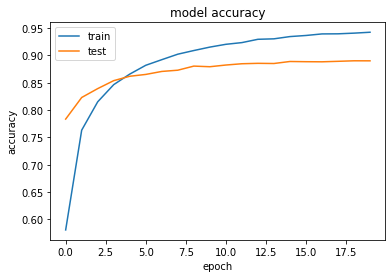

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left') 
plt.show()
# summarize history for loss plt.plot(history.history['loss']) plt.plot(history.history['val_loss']) plt.title('model loss')

XGBoost

In [ ]:
import xgboost as xgb

